In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import glob
import pathlib
from deepsudoku import REPO_PATH
import os
os.chdir(REPO_PATH)
import glob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns

dfs = {pathlib.Path(i).name.replace(".csv","") : pd.read_csv(i) for i in glob.glob("reinforcement_exp/csvs/*")}
dfs

{'Sudoku-x1__MultiActionOtherRewards__1__1693062297':       Unnamed: 0  avg_episodic_return  avg_episodic_length  learning_rate  \
 0           1024            -0.044388             1.044898       0.000250   
 1           2048            -0.309548             1.051335       0.000250   
 2           3072            -0.338296             1.050308       0.000250   
 3           4096            -0.269507             1.051335       0.000250   
 4           5120            -0.281059             1.043788       0.000250   
 ...          ...                  ...                  ...            ...   
 1132     1160192             0.893148             1.189315       0.000221   
 1133     1161216             1.397436             1.192308       0.000221   
 1134     1162240             0.585681             1.201878       0.000221   
 1135     1163264             1.137791             1.188372       0.000221   
 1136     1164288             1.039884             1.187283       0.000221   
 
       va

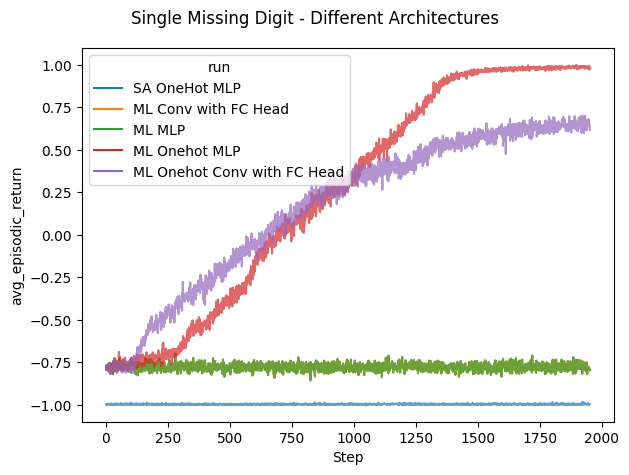

In [2]:
one_number = {
    "Sudoku-v0__SingleActionTest__1__1693059453" : "SA OneHot MLP",
    "Sudoku-v0__ConvActor__1__1693051529" : "ML Conv with FC Head",
    "Sudoku-v0__SplitMLP__1__1693051553" : "ML MLP",
    "Sudoku-v0__first_try__1__1693050650" : "ML Onehot MLP",
    "Sudoku-v0__only1__1__1693049832" : "ML Onehot Conv with FC Head"
              }

one_missing_digit = []

for k,n in one_number.items():
    
    df = dfs[k]
    df["run"] = n
    one_missing_digit.append(df)
    
one = pd.concat(one_missing_digit)
sns.lineplot(one.reset_index(names = "Step"), x="Step", y = "avg_episodic_return", hue = "run", alpha = 0.7)
plt.suptitle("Single Missing Digit - Different Architectures")
plt.tight_layout()
plt.show()

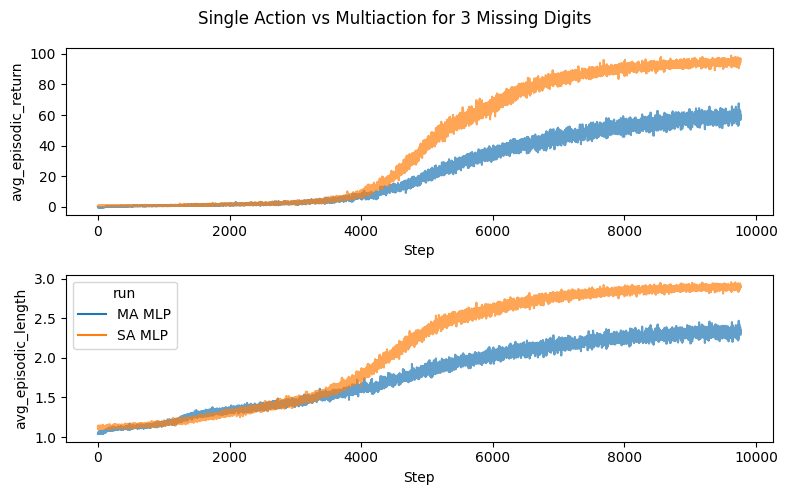

In [3]:
t_names = {
    "Sudoku-x1__MultiActionOtherRewardsLonger__1__1693063717": "MA MLP",
    "Sudoku-x1__SA_OneHot_MLP_x1__1__1693136381": "SA MLP"
}


three_missing_digit = []

for k,n in t_names.items():
    
    df = dfs[k]
    df["run"] = n
    three_missing_digit.append(df)
    
three = pd.concat(three_missing_digit)
plt.figure(figsize=(8,5))
ax1 = plt.subplot(2,1,1)

sns.lineplot(three.reset_index(names = "Step"), x="Step", y = "avg_episodic_return", hue = "run", alpha = 0.7, legend = None)


plt.subplot(2,1,2, sharex = ax1)

sns.lineplot(three.reset_index(names = "Step"), x="Step", y = "avg_episodic_length", hue = "run", alpha = 0.7)
plt.suptitle("Single Action vs Multiaction for 3 Missing Digits")

plt.tight_layout()
plt.show()

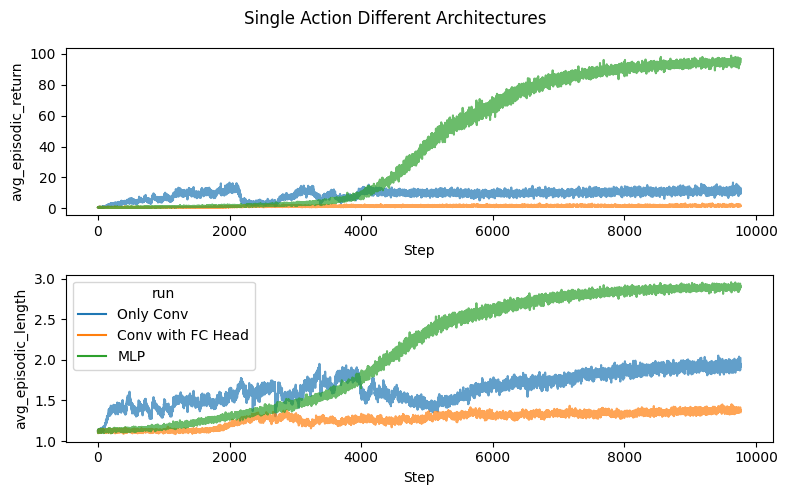

In [4]:
t_names = {
    "Sudoku-x1__SA_Only_Conv_OneHot_x1__1__1693157419" : "Only Conv",
    "Sudoku-x1__SingleConvActorOnehot__1__1693226088": "Conv with FC Head",
    "Sudoku-x1__SA_OneHot_MLP_x1__1__1693136381": "MLP",
}


three_missing_digit = []

for k,n in t_names.items():
    
    df = dfs[k]
    df["run"] = n
    three_missing_digit.append(df)
    
three = pd.concat(three_missing_digit)

plt.figure(figsize=(8,5))
ax1 = plt.subplot(2,1,1)

sns.lineplot(three.reset_index(names = "Step"), x="Step", y = "avg_episodic_return", hue = "run", alpha = 0.7, legend = None)


plt.subplot(2,1,2, sharex = ax1)

sns.lineplot(three.reset_index(names = "Step"), x="Step", y = "avg_episodic_length", hue = "run", alpha = 0.7)

plt.suptitle("Single Action Different Architectures")

plt.tight_layout()
plt.show()

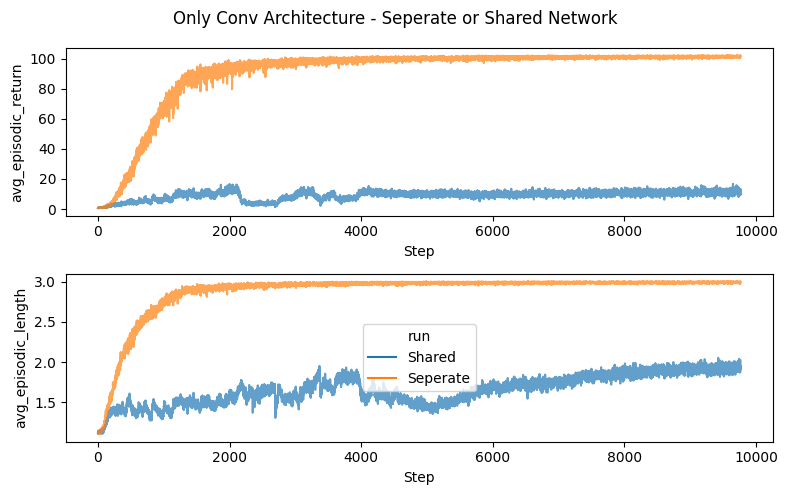

In [5]:
t_names = {
    "Sudoku-x1__SA_Only_Conv_OneHot_x1__1__1693157419": "Shared",
    "Sudoku-x1__OnlyConvSeperateValue_x1__1__1693208500" : "Seperate"
}


three_missing_digit = []

for k,n in t_names.items():
    
    df = dfs[k]
    df["run"] = n
    three_missing_digit.append(df)
    
three = pd.concat(three_missing_digit)

plt.figure(figsize=(8,5))
ax1 = plt.subplot(2,1,1)

sns.lineplot(three.reset_index(names = "Step"), x="Step", y = "avg_episodic_return", hue = "run", alpha = 0.7, legend = None)


plt.subplot(2,1,2, sharex = ax1)

sns.lineplot(three.reset_index(names = "Step"), x="Step", y = "avg_episodic_length", hue = "run", alpha = 0.7)

plt.suptitle("Only Conv Architecture - Seperate or Shared Network")

plt.tight_layout()
plt.show()

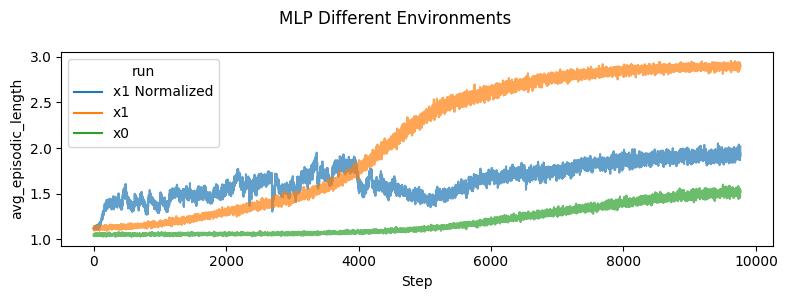

In [6]:
t_names = {
    "Sudoku-x1__SA_Only_Conv_OneHot_x1__1__1693157419": "x1 Normalized",
    "Sudoku-x1__SA_OneHot_MLP_x1__1__1693136381": "x1",
    "Sudoku-v0__ML_OneHot_MLP_v0__1__1693136306": "x0"
}



three_missing_digit = []

for k,n in t_names.items():
    
    df = dfs[k]
    df["run"] = n
    three_missing_digit.append(df)
    
three = pd.concat(three_missing_digit)

plt.figure(figsize=(8,3))


sns.lineplot(three.reset_index(names = "Step"), x="Step", y = "avg_episodic_length", hue = "run", alpha = 0.7)

plt.suptitle("MLP Different Environments")

plt.tight_layout()
plt.show()

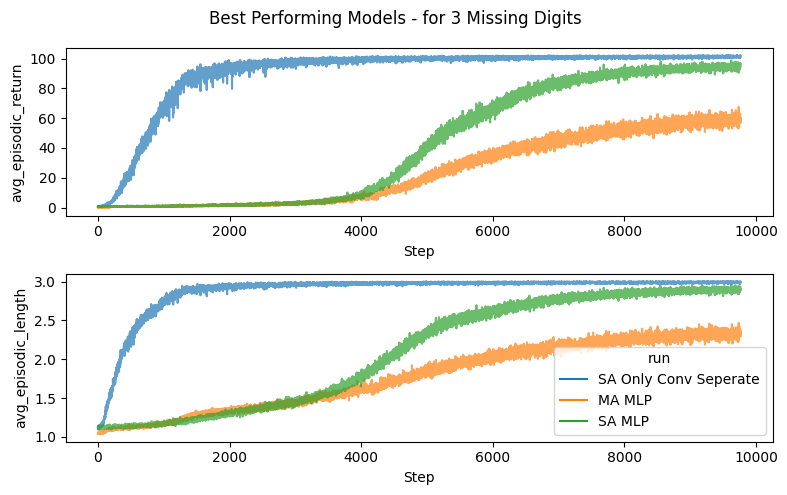

In [7]:
t_names = {
    "Sudoku-x1__OnlyConvSeperateValue_x1__1__1693208500" : "SA Only Conv Seperate",
    "Sudoku-x1__MultiActionOtherRewardsLonger__1__1693063717": "MA MLP",
    "Sudoku-x1__SA_OneHot_MLP_x1__1__1693136381": "SA MLP"
}


three_missing_digit = []

for k,n in t_names.items():
    
    df = dfs[k]
    df["run"] = n
    three_missing_digit.append(df)
    
three = pd.concat(three_missing_digit)

plt.figure(figsize=(8,5))
ax1 = plt.subplot(2,1,1)

sns.lineplot(three.reset_index(names = "Step"), x="Step", y = "avg_episodic_return", hue = "run", alpha = 0.7, legend = None)


plt.subplot(2,1,2, sharex = ax1)

sns.lineplot(three.reset_index(names = "Step"), x="Step", y = "avg_episodic_length", hue = "run", alpha = 0.7)

plt.suptitle("Best Performing Models - for 3 Missing Digits")

plt.tight_layout()
plt.show()